In [56]:
import EulersMethod
from EulersMethod import euler_method, euler_method_table_gen
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd
import numpy as np
import importlib

importlib.reload(EulersMethod)

# oxygen(kg) a person consumes per year
L = 740

# oxygen(kg) per douglas fir tree produces per year
o = 100

# human population relative growth factor
a = 0.021

# plant population relative growth factor
b = 0.039

# surface area of space colony in km^2
surface_area = 1294.99

# number of douglas-fir trees per hecta acre
tree_density = 2960

# hecta acre to km^2
ha_to_km2 = 0.01

# max number of plants
max_plants = tree_density * (1/ha_to_km2) * surface_area

def population_dynamics(t, S):
    n, p = S
    return [a*n - ((a * (n**2)) / ( (o/L)*p) ),
            b*p - (b * (p**2)) / max_plants]

n_0 = 1000
p_0 = 1000*L/o
S_0 = [n_0, p_0]
tf = 800


t = np.linspace(0, tf, tf+1)

eulerSol = euler_method(population_dynamics, S_0, 0, tf, 1)
n_list = []
p_list = []
for data in eulerSol[1]:
    n_list.append(data[0])
    p_list.append(data[1])

rungeKuttaSol = solve_ivp(population_dynamics, t_span=(0, max(t)), y0=S_0, t_eval=t).y

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

#plt.plot(t, rungeKuttaSol[0], label = "Number of Humans")
#plt.plot(t, np.multiply(p_list, 1), label = "Tree Population")
#plt.plot(t, np.multiply(rungeKuttaSol[1], (o/L)), label = "Carrying Capacity")
#plt.legend()

#plt.ylabel('Number of Trees')
#plt.ylabel('Number of Humans')
#plt.title("Human Population [Explicit Runge-Kutta]")
#plt.title("Human Population [Euler's Method h=1]")
#plt.title("Tree Population [Euler's Method h=1]")

#plt.show()

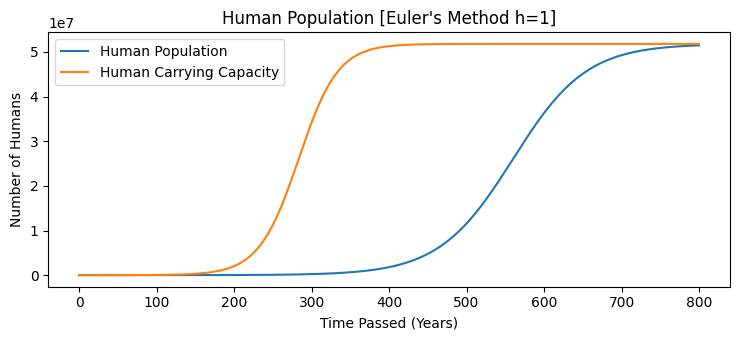

In [57]:
#Number of Humans Euler
plt.plot(eulerSol[0], n_list, label = "Human Population")
plt.plot(eulerSol[0], np.multiply(p_list, (o/L)), label = "Human Carrying Capacity")
plt.ylabel('Number of Humans')
plt.xlabel('Time Passed (Years)')
plt.legend()
plt.title("Human Population [Euler's Method h=1]")
plt.show()

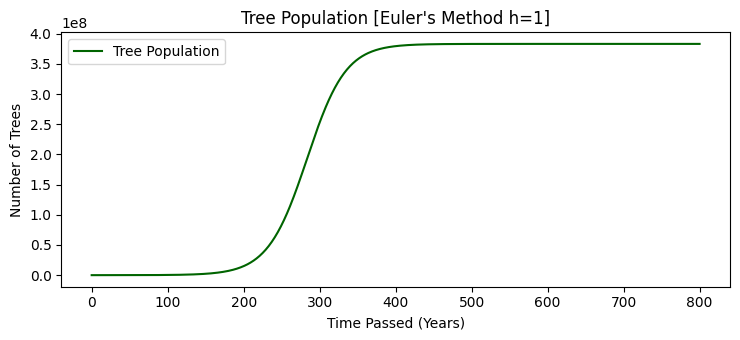

In [64]:
#Number of trees euler
plt.clf()
plt.plot(eulerSol[0], p_list, label = "Tree Population", color='darkgreen')
plt.ylabel('Number of Trees')
plt.xlabel('Time Passed (Years)')
plt.legend()
plt.title("Tree Population [Euler's Method h=1]")
plt.show()

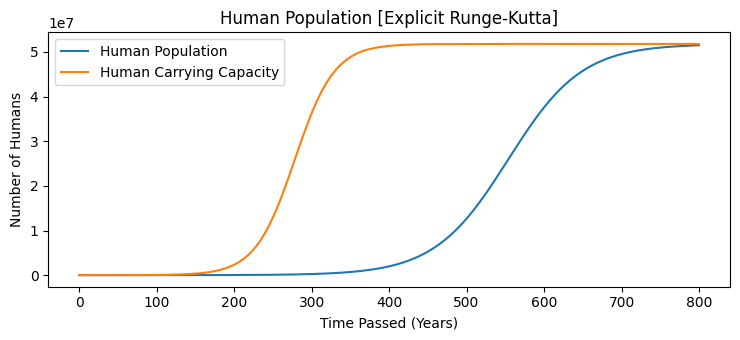

In [59]:
plt.clf()
plt.plot(t, rungeKuttaSol[0], label = "Human Population")
plt.plot(eulerSol[0], np.multiply(rungeKuttaSol[1], (o/L)), label = "Human Carrying Capacity")
plt.ylabel('Number of Humans')
plt.xlabel('Time Passed (Years)')
plt.legend()
plt.title("Human Population [Explicit Runge-Kutta]")
plt.show()

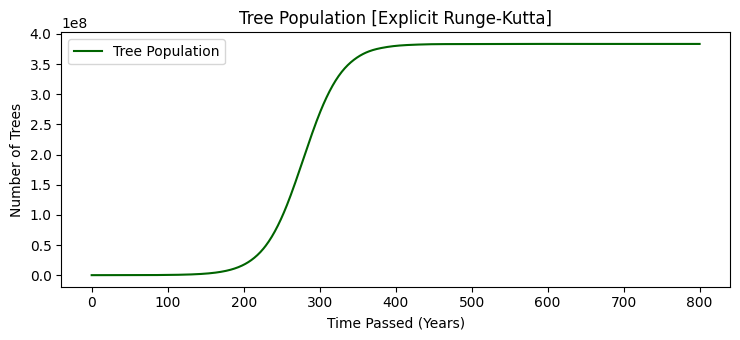

In [65]:
plt.clf()
plt.plot(t, rungeKuttaSol[1], label = "Tree Population", color='darkgreen')
plt.ylabel('Number of Trees')
plt.xlabel('Time Passed (Years)')
plt.legend()
plt.title("Tree Population [Explicit Runge-Kutta]")
plt.show()

Text(0.5, 1.0, "Human Population: Euler's Method vs Runge-Kutta")

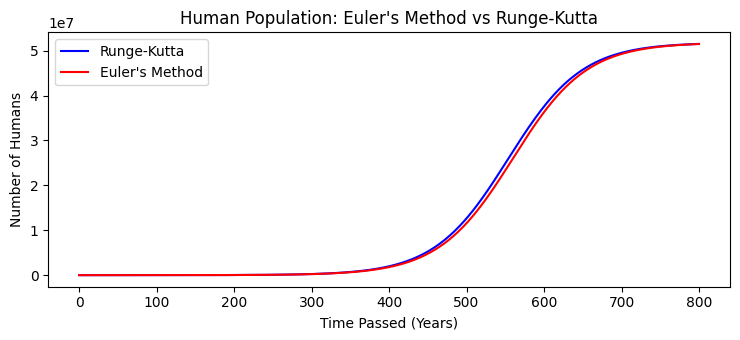

In [67]:
plt.clf()
plt.plot(t, rungeKuttaSol[0], label = "Runge-Kutta", color='b')
plt.plot(eulerSol[0], n_list, label = "Euler's Method", color='r')
plt.ylabel('Number of Humans')
plt.xlabel('Time Passed (Years)')
plt.legend()
plt.title("Human Population: Euler's Method vs Runge-Kutta")

In [61]:
#Generating Table
pd.set_option('display.max_columns', None)
df = pd.DataFrame(euler_method_table_gen(population_dynamics, S_0, 0, tf, 1, 100))
df

,Time,N,dN/dt,P,dP/dt
0,100,4.016003e+03,75.361466,3.391755e+05,1.272089e+04
1,200,2.953694e+04,598.693364,1.498580e+07,5.420794e+05
2,300,2.319435e+05,4739.150158,2.529885e+08,3.395854e+06
3,400,1.794424e+06,35667.079021,3.795955e+08,1.494439e+05
4,500,1.158039e+07,186629.733845,3.832467e+08,2.855241e+03
5,600,3.632075e+07,229840.833665,3.833157e+08,5.347462e+01
6,700,4.926877e+07,51525.944522,3.833170e+08,1.001128e+00
7,800,5.148262e+07,6755.955175,3.833170e+08,1.874253e-02


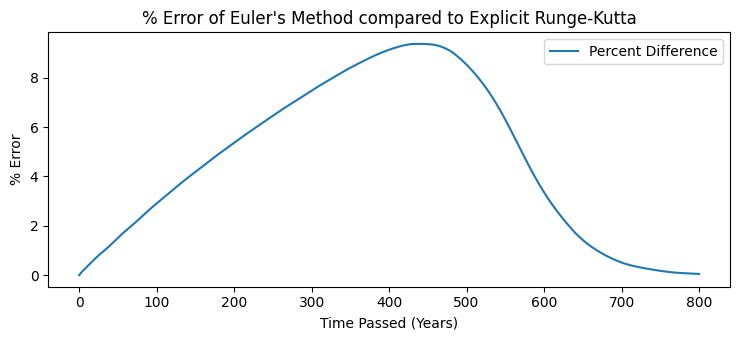

In [62]:
#Generating Error Charts
plt.clf()

percent_error = np.multiply(np.divide(np.abs(np.subtract(rungeKuttaSol[0], n_list)), rungeKuttaSol[0]), 100)
plt.plot(t, percent_error, label = "Percent Difference")
plt.ylabel('% Error')
plt.xlabel('Time Passed (Years)')
plt.legend()
plt.title("% Error of Euler's Method compared to Explicit Runge-Kutta")
plt.show()


